32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


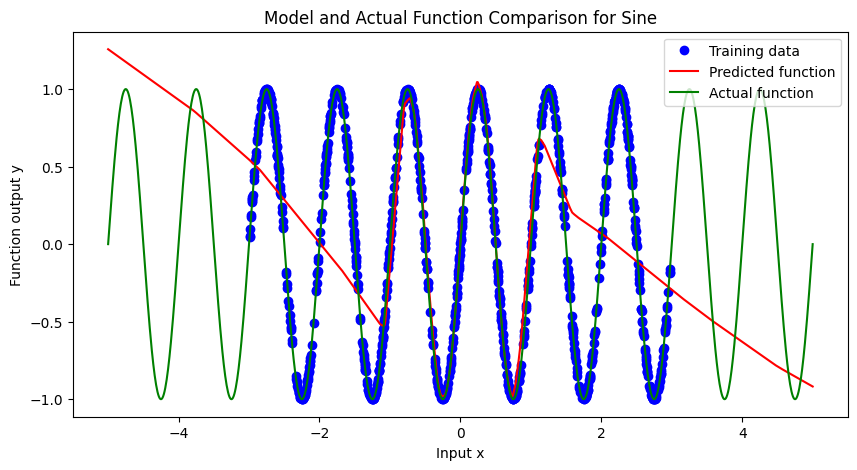

Mean Squared Error on Training Data for Sine: 0.2727958559989929
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


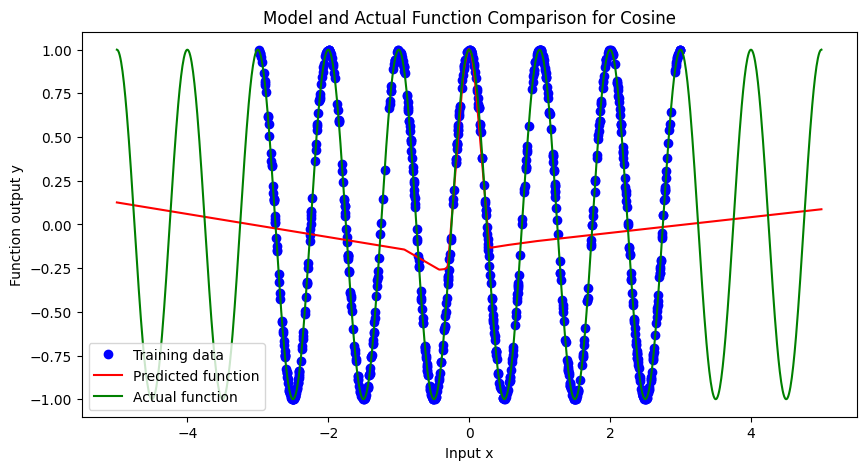

Mean Squared Error on Training Data for Cosine: 0.43904945254325867
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


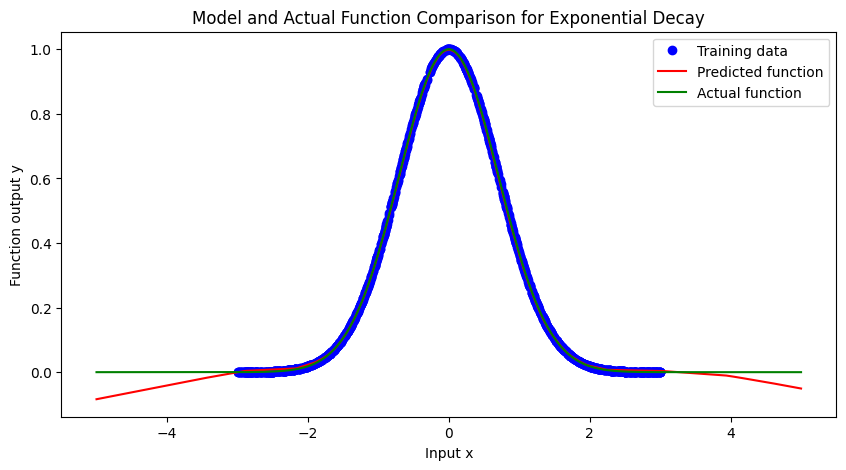

Mean Squared Error on Training Data for Exponential Decay: 9.899410542857368e-06
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


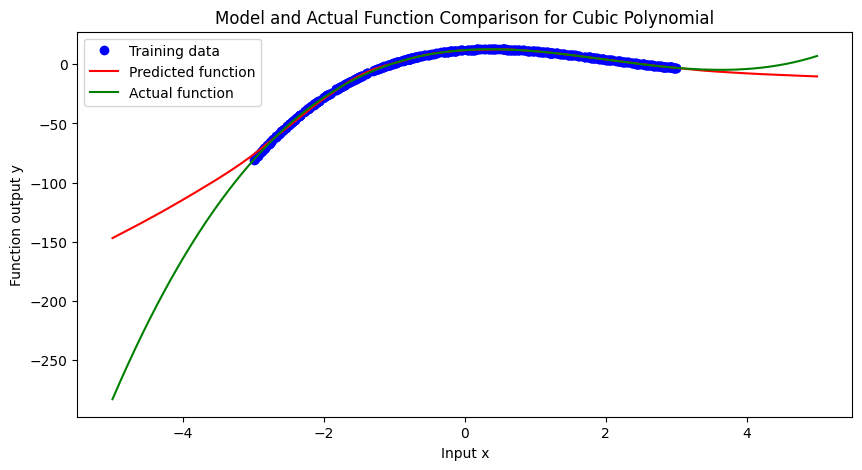

Mean Squared Error on Training Data for Cubic Polynomial: 0.6679752469062805
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


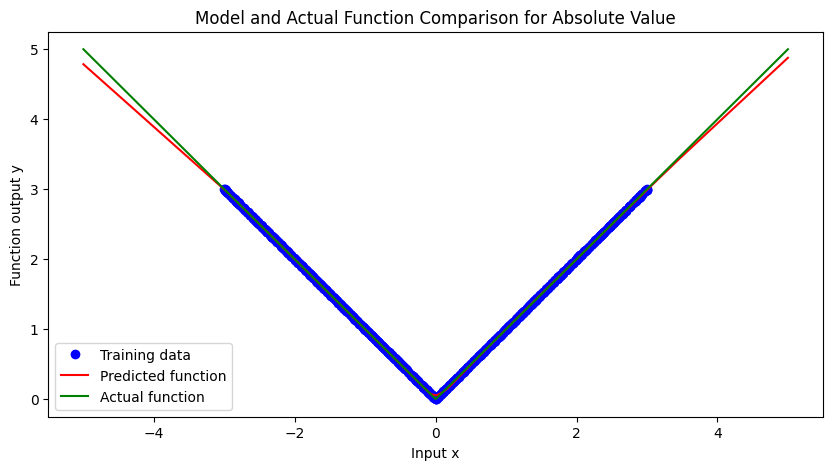

Mean Squared Error on Training Data for Absolute Value: 4.47771126346197e-05


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define a set of mathematical functions for data generation
def func_sin(x):
    return np.sin(2 * np.pi * x)

def func_cos(x):
    return np.cos(2 * np.pi * x)

def func_exp(x):
    return np.exp(-x ** 2)

def func_poly(x):
    return x ** 3 - 6 * x ** 2 + 4 * x + 12

def func_abs(x):
    return np.abs(x)

# Function to generate training data
def generate_data(func, x_min, x_max, n_points=1000):
    x_train = np.random.uniform(x_min, x_max, size=(n_points, 1))
    y_train = func(x_train)
    return x_train, y_train

# Function to create and compile the MLP model
def create_model(input_shape=(1,), n_layers=2, n_neurons=64, optimizer='adam', loss='mse'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
    for _ in range(n_layers - 1):
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model

# Function to plot the results
def plot_results(x_train, y_train, x_plot, y_plot, y_actual, title='Model and Actual function comparison'):
    plt.figure(figsize=(10, 5))
    plt.plot(x_train, y_train, 'bo', label='Training data')
    plt.plot(x_plot, y_plot, 'r', label='Predicted function')
    plt.plot(x_plot, y_actual, 'g', label='Actual function')
    plt.title(title)
    plt.xlabel('Input x')
    plt.ylabel('Function output y')
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Function configurations
    configurations = {
        'Sine': {'n_points': 1000, 'n_layers': 3, 'n_neurons': 64},
        'Cosine': {'n_points': 800, 'n_layers': 2, 'n_neurons': 50},
        'Exponential Decay': {'n_points': 1200, 'n_layers': 4, 'n_neurons': 80},
        'Cubic Polynomial': {'n_points': 500, 'n_layers': 3, 'n_neurons': 100},
        'Absolute Value': {'n_points': 900, 'n_layers': 2, 'n_neurons': 40}
    }
    x_min, x_max = -3, 3
    epochs = 32
    functions = [func_sin, func_cos, func_exp, func_poly, func_abs]
    function_names = ['Sine', 'Cosine', 'Exponential Decay', 'Cubic Polynomial', 'Absolute Value']

    # Loop through each function and configuration
    for func, name in zip(functions, function_names):
        config = configurations[name]

        # Generate data
        x_train, y_train = generate_data(func, x_min, x_max, n_points=config['n_points'])

        # Create and train the model
        model = create_model(n_layers=config['n_layers'], n_neurons=config['n_neurons'])
        model.fit(x_train, y_train, epochs=epochs, verbose=0)

        # Prepare plot data
        x_plot = np.linspace(x_min - 2, x_max + 2, num=1000).reshape(-1, 1)
        y_plot = model.predict(x_plot)
        y_actual = func(x_plot)

        # Plot and evaluate
        plot_results(x_train, y_train, x_plot, y_plot, y_actual, title=f'Model and Actual Function Comparison for {name}')
        mse = model.evaluate(x_train, y_train, verbose=0)
        print(f"Mean Squared Error on Training Data for {name}: {mse}")
